In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as Linear
import pandas as pd
df=pd.read_excel('/Users/ianfla/Documents/GitHub/Lose-Weight/weight.xlsx',engine='openpyxl',header=None)
t=df[2].values[0:-1]
w=df[1].values[0:-1]
goal=60

In [2]:
df.tail(8)

,0,1,2
216,210707,69.9,235.0
217,210708,69.7,236.0
218,210709,69.3,237.0
219,210710,68.8,238.0
220,210711,69.0,239.0
221,210712,69.8,240.0
222,210713,68.9,241.0
223,210714,NaN,NaN


In [3]:
X=sm.add_constant(t)
y=w
memory=10
fit=sm.WLS(y,X,weights=np.exp(-(t[-1]-t)/memory)).fit()
alpha,beta=fit.params
T=-(alpha-goal)/beta

fit2=Linear().fit(t.reshape(-1,1),y)
alpha2=fit2.intercept_
beta2=fit2.coef_[0]
T2=-(alpha2-goal)/beta2

You are becoming lazy!


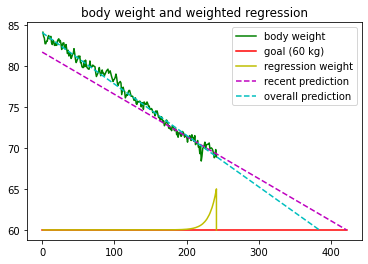

already lost: 30.4 catties
progress: 63.07%
remaining time (recent): 179.9 days (already 241.0 days)
remaining time (overall): 142.28 days


In [4]:
if alpha>0 and beta<0:
    if beta>beta2:
        print('You are becoming lazy!')
    else:
        print('Keep the momentum going!')
        
    plt.plot(t,w,c='g',label='body weight')
    plt.plot([0,max(T,T2)],[goal,goal],c='r',label='goal (60 kg)')
    plt.plot(np.append(t,t[-1]),np.append(goal+5*np.exp(-(t[-1]-t)/memory),goal),c='y',label='regression weight')
    plt.plot([0,T],[alpha,goal],'m--',label='recent prediction')
    plt.plot([0,T2],[alpha2,goal],'c--',label='overall prediction')
    plt.legend()
    plt.title('body weight and weighted regression')
    plt.show()
    p=(w[0]-w[-1])/(w[0]-goal)
    print('already lost:',round(2*(w[0]-w[-1]),ndigits=2),'catties')
    print('progress:',str(round(p*100,ndigits=2))+'%')
    print('remaining time (recent):',round(T-t[-1],ndigits=2),'days (already',t[-1],'days)')
    print('remaining time (overall):',round(T2-t[-1],ndigits=2),'days')
else:
    print('Your weight is going up!!!')

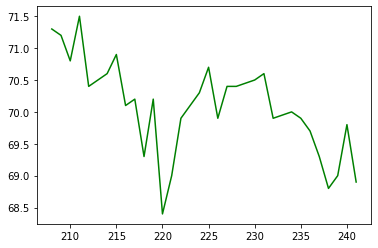

In [5]:
plt.plot(t[-30:],w[-30:],c='g')
plt.show()